
# Week 8: Probability: Part I
## Data Fundamentals (H)
##  Probability theory, Bayes' Rule, discrete and continuous random variables
----
 ##### DF(H) - University of Glasgow - John H. Williamson - 2020/2021

# Summary
By the end of this unit you should know:
* what probability is, and different philosophical interpretations of it
* what inverse and forward probability are
* what a random variable, distribution, probability mass/density function are
* what the empirical distribution is and how it is computed from data
* what expectation/expected value is
* the axioms of probability theory
* conditional, marginal and joint distribution
* what entropy is and how it can be computed
* Bayes' rule and how to apply it problems
* what bigrams are and how they can be used
* representation of probability as odds, log-odds and log-probabilities and the numerical effects of these representations


In [1]:
import IPython.display
IPython.display.HTML("""
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>""")

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from jhwutils.float_inspector import print_shape_html, print_float, print_float_html
from jhwutils.matrices import show_boxed_tensor_latex, print_matrix
import jhwutils.image_audio as ia
import numpy as np
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

$$\newcommand{\vec}[1]{{\bf #1} } 
\newenvironment{examinable}{}{{\ \ [\spadesuit]}}
\newcommand{\real}{\mathbb{R}}
\newcommand{\expect}[1]{\mathbb{E}[#1]}
\DeclareMathOperator*{\argmin}{arg\,min}
\begin{examinable}
\vec{x}
\real
\end{examinable}
$$


# Example: the lost submarine

The *USS Scorpion* was a nuclear armed submarine that disappeared on 30th June 1968 somewhere in the Atlantic.  [This was a year in which *four* submarines were inexplicably lost at sea -- **the 1968 submarine mystery**.]

<img src="imgs/scorpion.jpg">

*Image: USS Scorpion at sea. Credit: US Navy, public domain*

The search for the submarine was one of the first times **probabilistic methods** were used for searching. The US Navy needed to find the submarine and recover it as fast as possible. Probabilistic methods allow us to reason *precisely* about things we are uncertain about -- like where the submarine is. Probability gives a concrete, computable representations for an uncertain world.

Imagine dividing the possible search areas into grid squares. Then, for example, it makes sense to ask *what is the probability that the submarine lies within a specific square?*. A map like this might be produced, where squares are colored according to their probability:

<img src="imgs/sea_grid.png">

## But what happened to the Scorpion?




# Probability
This section of the course is concerned with **stochastic elements**; the role of uncertainty, randomness and statistics in computation. The fundamental mathematical principles are drawn from **probability theory**, which gives us simple and powerful ways of manipulating uncertain values, and lets us do useful operations like inferring the most likely hypotheses given some observations. Probability theory is a simple, consistent, and effective way to manipulate uncertainty.

## What is probability?

[The following definitions are directly adapted from Peter Norvig's Probability notebook: http://nbviewer.jupyter.org/url/norvig.com/ipython/Probability.ipynb]

* **Experiment** (or **trial**) An occurrence with an uncertain outcome.
    * For example, losing a submarine -- the location of the submarine is now unknown.
* **Outcome** The result of an experiment; one particular state of the world. 
    * For example: the submarine is in ocean grid square [2,3].
* **Sample Space** The set of *all possible* outcomes for an experiment. 
    * For example, ocean grid squares {[0,0], [0,1], [0,2], [0,3], ..., [8,7], [8,8], [8,9], [9,9]}.
* **Event** A *subset* of possible outcomes with some common property. 
    * For example, the grid squares which are south of the Equator.
* **Probability** The probability of an event *with respect to a sample space* is the number of outcomes from the sample space that are in the event, divided by the total number of outcomes in the sample space. Since it is a ratio, probability will always be a real number between 0 (representing an impossible event) and 1 (representing a certain event).  
    * For example, the probability of the submarine being below the equator, or the probability of the submarine being in grid square [0,0] (in this case the event is just a single outcome).
* **Probability distribution** A mapping of outcomes to probabilities that sum to 1. This is because an outcome must happen from a trial (with probability 1) so the sum of all possible outcomes together will be 1. A random variable has a probability distribution which maps each outcome to a probability.
    * For example $P(X=x)$, the probability that the submarine is in a specific grid square $\vec{x}$.
* **Random variable** A variable representing an unknown value, whose probability distribution we *do* know. The variable is associated outcomes of a trial    
    * For example, $X$ is a random variable representing the location of the submarine. 
* **Probability density/mass function** A function that *defines* a probability distribution by mapping each outcome to a probability $f_X(x), x \rightarrow \real$. This could be a continuous function over $x$ (density) or discrete function over $x$ (mass).
    * For example $f_X(x)$ would be a probability mass function for the submarine, which maps each grid square to real number representing its probability.
* **Observation** An outcome that we have directly observed; i.e. data.
    * For example, a submarine was found in grid square [0,5]
* **Sample** An outcome that we have simulated according a probability distribution. We say we have **drawn** a sample from a distribution.
    * For example, if we believe that the submarine was distributed according to some pattern, generate possible concrete grid positions that follow this pattern.
* **Expectation/expected value** The "average" value of a random variable.
    * The submarine was on average in grid square [3.46, 2.19]
    

## In prose
A random variable $X$ *has* a probability distribution $P(X)$ which *assigns* probabilities $0 \leq P(X=x)  \leq1$ to *outcomes* $x$ which *belong* to a sample space $\mathbb{x}$. That probability distribution is *defined* by a probability density/mass function $f_X(x)$ which assigns probabilities to outcomes such that the sum of probabilities over all outcomes is 1, $\sum_{x\in \mathbb{x}} f_X(x)=1$. We can *observe* specific outcomes $x_i$ drawn from a distribution as a result of *trials*. We can *sample* (simulate) new outcomes $x'_j$ given a distribution P(X). Assuming outcomes have values we can *evaluate* the average expected value $\expect{X}$ across infinitely many trials.

# Philosophy of probability
There are two schools of thought regarding probability and its uses. We will be (largely) following the **Bayesian interpretation**, but its worth understanding what that entails.

## Bayesian/Laplacian view on probability
**Bayesians** treat probability as a **calculus of belief**; in this model of thought, probabilities are measures of *degrees of belief*. $P(A)=0$ means a belief that event $A$ cannot be true and $P(A)=1$ is a belief that event $A$ is absolutely certain. In the Bayesian perspective, it makes sense to say "the probability it is raining outside is 0.3" (the probability quantifies our belief about the weather given the information we have). **Note that is not a statement that we believe that the weather is 0.3 rainy (whatever that means)**

![](imgs/bayes.gif)

*Image: A portrait of a man who isn't Thomas Bayes,  who didn't propose Bayesian probability theory.*

**Bayesians** allow for belief in states to be combined and manipulated via the rules of probability. The key process in Bayesian logic is *updating of beliefs*. Given some:
* **prior** belief (it's Glasgow, it's not likely to be sunny) and some
* new **evidence** (there seems to be a bright reflection inside) we can 
* update our belief to calculate the **posterior** -- our new probability that it is sunny outside. 

Bayesian inference requires that we accept priors over events, i.e. that we must explicitly quantify our assumptions with probability distributions.  It is an extension of logic to uncertain information.

### USS Scorpion
For example, in the submarine search, the prior might be that the submarine is probably in the south Atlantic (given the last radio broadcast received). Evidence might be the result of sonar surveys from search ships. After each survey, the posterior probability of the submarine being in the survey area could be updated. This represents our belief about where the vessel might be.

## Frequentist view of probability
There is an alternative school of thought that considers probabilities to *only* be the long-term behaviour of repeated events (e.g. the probability of a coin coming up heads in 0.5 because over the long term this will be the average proportion of times this occurs). 

A **frequentist** does not accept phrases like "what is the probability it is sunny just now?" as there is no long term behaviour involved (it is only "now" once). It does not make sense in this world view to talk about the probability of events that can only happen once. It *does* make sense in a frequentist view to ask things like "what is the probability it will be sunny on any given day?" since we can measure this event (sunny or not) for many different days. For example, frequentists would not assign a probability to the USS Scorpion being in a specific grid square; this is not an experiment that can be repeated.




### Objectivity and subjectivity
Frequentist versus Bayesian debates quickly enter philosophical territory. The diversity of viewpoints and depth of arguments cannot be done justice here. 

Very briefly, Bayesian probability theory is sometimes said to be **subjective** because it requires the specification of prior belief, whereas frequentist models of probability do not admit the concept of priors and thus is  **objective**. 

An alternative view is that the Bayesian model explicitly encodes uncertain knowledge and states universal formal rules for manipulating that knowledge, as formal logic does for definite knowledge. Frequentist methods are objective in the sense that they make statements about universal truths (e.g. asymptotic behaviour), but they do not form a calculus of belief, and thus can't answer many questions of importance directly.


#### Bayesian
* Includes **priors**
* Probability is a **degree of belief**
* (Parameters of population considered to be random variables, data to be known)

#### Frequentist
* No **priors**
* Probability is the *long-term frequency of events*
* (Parameters of population assumed to be fixed, data to be random)

## Superiority of probabilistic models
Regardless of the philosophical model you subscribe to, there is one thing you can be sure of: *probability is the best*. 

There are other models of uncertainty than probability theory that are sometimes used. However, all other representations of uncertainty are *strictly inferior* to probabilistic methods *in the sense that* a person, agent, computer placing "bets" on future events using probabilistic models has the best possible return out of all decision systems when there is uncertainty. 

> *Any theory with as good a gambling outcome as would be achieved using probability theory is equivalent to probability theory.*

----

## Generative models: forward and inverse probability
A key idea in probabilistic models is that of a **generative process**; the idea that there is some unknown process going on, the results of which can be observed. The process itself is governed by unobserved variables that we do not know but which we can **infer**.

<img src="imgs/urn.png">

The classic example is an **urn problem**. Consider an urn, into which a number of balls have been poured (by some mysterious entity, say). Each ball can be either black or white. 

You pull out four random balls from the urn and observe their colour. You get four white balls. 

There are lots of questions you can ask now:

* What is the probability that the next ball that is drawn will be white? 
    * This is a **forward probability** question. It asks questions related to the distribution of the observations.
* What is the distribution of white and black balls in the urn? 
    * This is an **inverse probability** question. It asks questions related to unobserved variables that govern the process that generated the observations.
* Who is the mysterious entity?
    * This is an unknowable question. The observations we make cannot resolve this question.
    
There are a huge number of processes that can be framed as urn problems (urns where balls are replaced, problems where there are multiple urns and you don't know which urn the balls came from, problems where balls can move between urns, and so on). 





----------

# A formal basis for probability theory
## Axioms of probability



There are only a few basic axioms of probability, from which everything else can be derived. Writing $P(A)$ to mean the probability of event $A$ (NOTE: these apply to **events** (sets of outcomes), not just outcomes!):
<div class="alert alert-success alert-box">
    
* **Boundedness**
$$0 \leq P(A) \leq 1
$$ all possible events $A$ -- probabilities are 0, or positive and less than 1.
* **Unitarity**
$$
\sum_A P(A)=1
$$ for the complete set of possible **outcomes** (not events!) $A \in \sigma$ in a sample space $\sigma$ -- something always happens.
* **Sum rule**
$$
P(A \lor B) = P(A) + P(B) - P(A \land B),
$$ i.e. the probability of either event $A$ or $B$ happening is the sum of the independent probabilities minus the probability of both happening.
 (notation note: $\lor$ means "or" and $\land$ means "and")
* **Conditional probability**
The conditional probability $P(A|B)$ is defined to be the probability that event $A$ will happen *given that we already know $B$ to have happened*.
$$P(A|B) = \frac{P(A \land B)}{ P(B)}$$
</div>



# Random variables and distributions
A **random variable** is a variable that can take on different values, but we do not know what value it has; i.e. one that is "unassigned". However, we have some knowledge which captures the possible states the variable could take on, and their corresponding probabilities. Probability theory allows us to manipulate random variables without having to assign them a specific value.

A random variable is written with a capital letter, like $X$.

A random variable might represent:

* the outcome of dice throw (discrete); 
* whether or not it is raining outside (discrete: binary); 
* the latitude of the USS Scorpion (continuous); 
* the height of person we haven't met yet (continuous). 

In the next unit, we will see how random variables can be implemented as first-class values in programming languages, just like floats or integers.

## Distributions
A **probability distribution** defines how likely different states of a random variable are. 

We can see $X$ as the the *experiment* and $x$ as the *outcome*, with a function mapping every possible outcome to a probability. We write $P(X=x)$ (note the case!), and use the shorthand notations:

$$P(X=x),\  \text{the probability of random variable X taking on value x}\\
P(X),\  \text{shorthand for probability of X=x }\\
P(x),\  \text{shorthand for probability of specific value X=x }\\
$$

We can see an outcome as a random variable taking on a specific value i.e. $P(X=x)$. Note that by convention we use $P(A)$ to mean the probability of **event** $A$, not a random variable $A$ (an **event** is a *set* of **outcomes**; **random variables** only assign probabilities to **outcomes**).

### Discrete and continuous
Random variables can be continuous (e.g. the height of a person) or discrete (the value showing on the face of a dice). 

* **Discrete variables** The distribution of a discrete random variable is described with a **probability mass function** (PMF) which gives each outcome a specific value; imagine a Python dictionary mapping outcomes to probabilities. The PMF is usually written $f_X(x)$, where $P(X=x) = f_X(x)$.

* **Continuous variables** A continuous variable has a **probability density function** (PDF) which specifies the spread of the probability over outcomes as a *continuous function* $f_X(x)$. It is **not** the case that $P(X=x) = f_X(x)$ for PDFs.

#### Integration to unity
A probability mass function or probability density function *must* sum/integrate to exactly 1, as the random variable under consideration must take on *some* value; this is a consequence of unitarity. Every repetition of an experiment has exactly one outcome.

$$\sum_i f_X(x_i) = 1\quad \text{for PMFs of discrete RVs}$$
$$\int_x f_X(x)\ dx = 1\quad \text{for PDFs of continuous RVs}$$



## PMF example: sum of dice rolls
A very simple discrete PMF is the expected value of the sum of two six-faced dice. $P(X=x) = f_X(x)$ takes on values for each possible outcome $x \in \{2,3,4,5,6,7,8,9,10,11,12\}$

In [17]:
# the PMF of the sum of two dice rolls
from IPython.display import display, Latex

def two_dice():
    # form the sum of the cross product of these possibilities
    roll_two = [i+j for i in range(1,7) for j in range(1,7)]
    
    
    # now plot the histogram
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    pmf, edges, patches = ax.hist(roll_two, density=True, bins=range(1,14))
    
    for k, v in zip(edges[1:], pmf[1:]):
        display(Latex(f"$P(X={k}) = {v:.2f}$"))
        
    print("Sum of PMF = %.2f" % np.sum(pmf)) # sum of probability should be *exactly* 1.0
    ax.set_title("PMF of sum of 2d6 dice")
    ax.set_xlabel("Sum of rolls x")
    ax.set_frame_on(False)
    ax.set_ylabel("P(X=x)")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Sum of PMF = 1.00


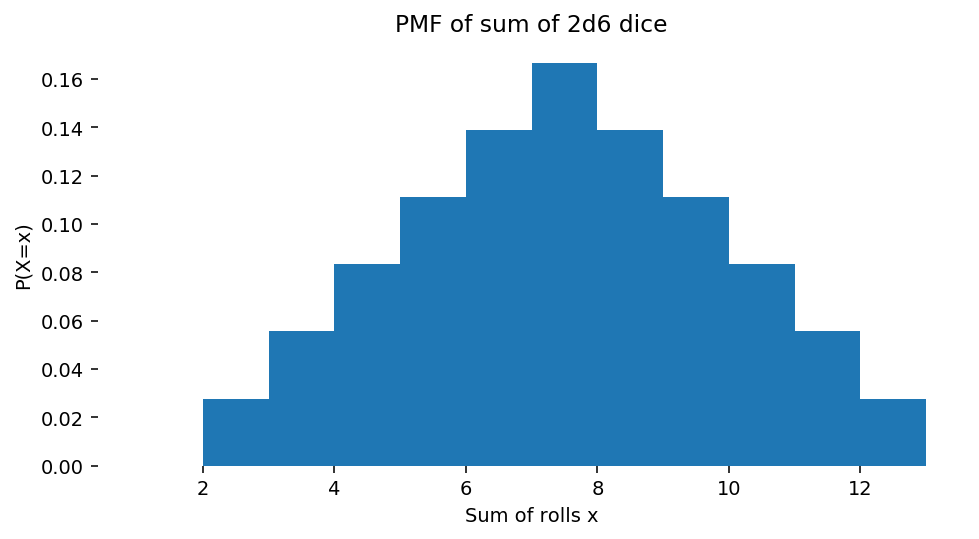

In [18]:
two_dice()

# Expectation
<div class="alert alert-success alert-box">
    
If a random variable takes on numerical values, then we can define the **expectation** or **expected value** of a random variable $\expect{X}$ as:

$$ \expect{X} = \int_x x\ f_X(x) dx $$

For a discrete random variable with probability mass function $P(X=x) = f_X(x)$, we would write this as a summation:

$$ \expect{X} = \sum_x  f_X(x) x $$



If there are only a finite number of possibilities, then this is: $$\expect{X} = P(X=x_1) x_1 + P(X=x_2) x_2 + \dots + P(X=x_n) x_n$$ 
</div>

The expectation is the "average" of a random variable. Informally, it represents what we'd "expect to happen"; the most likely overall "score". It can be thought of as a *weighted sum* of all the possible outcomes of an experiment, where each outcome is weighted by the probability of that outcome occurring.  

<img src="imgs/dice.jpg" width="50%">

For example, in the "pair of dice" scenario, we can compute the expected value of the number of "dots" showing in total after a roll. We compute the probability of each number of dots showing and multiply by that number of dots, and summing the result. This is the expected number of dots showing, on average, or the expectation.

In [19]:
from collections import Counter
dice_values =  [i+j for i in range(1,7) for j in range(1,7)]

# count the occurence of each possible value
counts = Counter(dice_values)
total_possibilities = len(dice_values)

pmf = np.array([counts[i]/total_possibilities for i in counts])
print("PMF of two dice:", pmf)
values = np.array([i for i in counts])
print("Face value of two dice:", values)

# expectation is each value weighted by probability.
expected_value = np.sum(pmf * values)
print("Expected value of sum of two dice: %.2f" % expected_value)

PMF of two dice: [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]
Face value of two dice: [ 2  3  4  5  6  7  8  9 10 11 12]
Expected value of sum of two dice: 7.00


This is an intuitive property. 

> Imagine you meet a street hustler, who asks you to play the two dice game. He offers you a chance to buy in for £8; you win as many pounds as the show on the top faces of the dice after throwing them. Is this a fair game?

No. The expected return is only £7, and you have to put in £8 to play, so the expected result is a £1 loss (sometimes stated as "negative expected value" or -ve EV). If it was £7 to buy in, the game would be fair, in the sense that you and the hustler would not transfer money on average.

## Expectation and means
Expectation corresponds to the idea of a **mean** or **average** result. The expected value of a random variable is the **true average** of the value of all outcomes that would be observed if we ran the experiment an infinite number of times. This is the **population mean** -- the mean of the whole, possibly infinite, population of a random variable.

Many important properties of random variables can be defined in terms of expectation. 

* The mean of a random variable $X$ is just $\expect{X}$. It is a measure of **central tendency**.
* The variance of a random variable $X$ is $\text{var}(X) = \expect{(X - \expect{X})^2}$. It is a measure of **spread**.

### Expectations of functions of X
We can apply functions to random variables, for example, the square of a random variable.
<div class="alert alert-box alert-success">

 The expectation of any function $g(X)$ of a continuous random variable $X$ is defined as:
$$\expect{g(X)} = \int_x f_X(x) g(x) dx$$
or

$$\expect{g(X)} = \sum_x f_X(x) g(x) dx$$
for a discrete random variable.
</div>

For example, we can compute simple expectations like these:

$$\expect{2X^2} = \sum_x f_X(x) 2x^2 dx$$

or 

$$\expect{\sin(X)} = \sum_x f_X(x) \sin(x) dx$$

That is, we just take the sum/integral of each outcome, passed through the function $g(x)$, weighted by the probability of the outcome $x$. $g(x)$ could be thought of a "scoring" function, which assigns a real number to every outcome of $X$. Note that $g(x)$ has no effect on the probability density/mass function $f_X(x)$. It doesn't affect the probability of the outcomes, just the *value assigned to those outcomes*. For example, if we played the a dice game where the score of a throw was the *square* of the number of dots showing, (so 2 showing would be worth 4 points, 8 showing would be worth 64 points, etc.) we would compute $\expect{X^2}$ as:


In [20]:
sqr_expected_value = np.sum(pmf * (np.arange(2,13))**2)
print("Expected value of square of sum of two dice: %.2f" % sqr_expected_value)

Expected value of square of sum of two dice: 54.83


<div class="alert alert-danger">

Be very careful:
    
$$E[f(X)] \neq f(E[X])$$
    
</div>    

To compute the expectation of a function, we need to compute the function of each outcome and sum weighted by the probability of that outcome. We cannot apply the function to the result of the expectation and get the same result!

In [21]:
## NOT THE SAME!
expected_value_sqr = np.sum(pmf * (np.arange(2,13)))**2
print("Square of the expected value of two dice: %.2f" % expected_value_sqr)

Square of the expected value of two dice: 49.00


Or we could compute the expectation of a two-dice game where you get ten points for any pair of identical rolls, and zero otherwise ("pairs or nothing"). I'll write this out as a matrix (of roll 1 and roll 2) for easy viewing. This doesn't change the computation.

In [22]:

# 6x6 matrix of outcomes
from jhwutils.matrices import print_matrix
p_faces = np.ones((6,6))/36.0
values = np.diag(np.full(6,10))

print_matrix("f_X(d_1, d_2)", p_faces)
print_matrix("g(d_1, d_2)", values)
# expected value of playing this game
print("Expected value of 'pairs or nothing' dice game", np.sum(p_faces*values))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Expected value of 'pairs or nothing' dice game 1.6666666666666665


Expected values are essential in making **rational decisions**, the central problem of **decision theory**. They combine scores (or **utility**) with uncertainty (**probability**).

The expected value gives us a way of deciding, for example, how much it would be worth paying to play a dice game. If the units were pounds, we'd break even if we paid £2.33 to play the game, and make a profit (on average) if we paid £2.00 to play the game. The expected average profit is just the stake we pay to play each game minus the expected value of one round of the game: $\mathbb{E}[\text{game}] = \text{stake} - \mathbb{E}[X]$



---

## Samples and sampling
**Samples** are observed outcomes of an experiment; we will use the term **observations** synonymously, though samples usually refer to simulations and observations to concrete real data. 

We can **sample** from a distribution; this means simulating outcomes according to the probability distribution of those variables. We can also **observe** data which comes from an external source, that might believe is generated by some probability distribution.
For example, we can sample from the sum of dice PMF by rolling two dice and summing the result. This is a *sample* or a *draw* from this distribution. For discrete random variables, this is easy: we simply produce samples by drawing each outcome according to its probability. We will discuss sampling strategies in the next unit.

## The empirical distribution

For discrete data, we can estimate the probability mass function that might be generating **observations** by 
counting each outcome seen divided by the total number of trials. This is called the **empirical distribution**.

This can be thought of as the **normalized histogram** of counts of occurrences of outcomes.

Text(0, 0.5, 'P(X)')

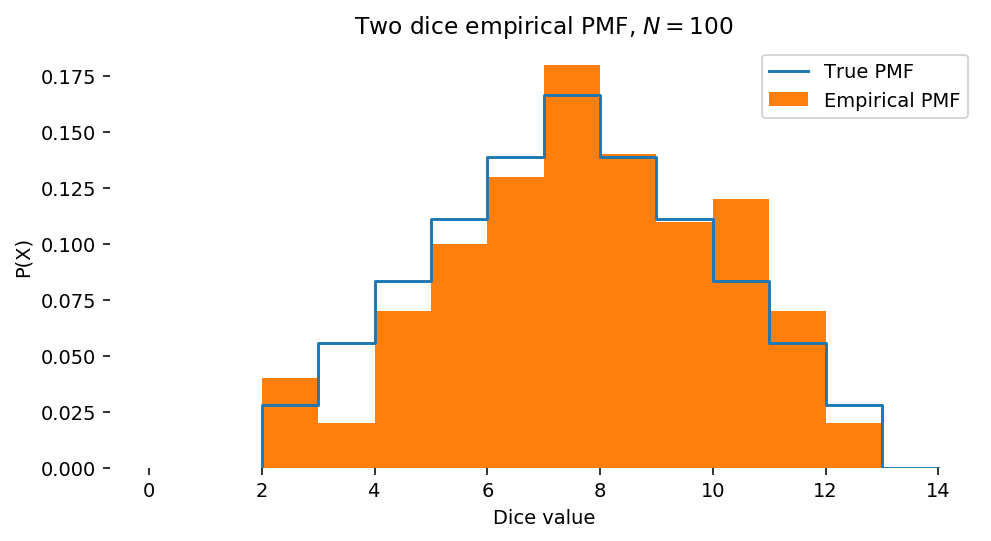

In [26]:
from collections import Counter

## PMF for dice rolls here
## simulate dice rolls
def simulate_two_dice(n):
    d1 = np.random.randint(1,7,n)
    d2 = np.random.randint(1,7,n)    
    return d1+d2

### Run some random sampling trials, plotting the empirical PMF
### and the true PMF (that generated those samples)
n_samples = 100 # number of samples in one repetition
trials = 1  # number of times to repeat

dice_values =  [i+j for i in range(1,7) for j in range(1,7)]

# compute the PMF (again)
counts = Counter(dice_values)
total_possibilities = len(dice_values)
pmf = np.array([0]+[counts[i]/total_possibilities for i in counts]+[0])

### Plot the figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.step(np.arange(2,15), pmf, label="True PMF")

for j in range(trials):
    # simulate a bunch of pairs of dice throws
    two_dice_samples = simulate_two_dice(n_samples)    
    label = "Empirical PMF" if j==0 else None
    # compute the normalized histogram (empirical PMF)
    ax.hist(two_dice_samples, bins = np.arange(0,15), density=True, label=label, alpha=1.0/trials, color='C1')
    
ax.legend()
ax.set_frame_on(False)
ax.set_title("Two dice empirical PMF, $N={n}$".format(n=n_samples))
ax.set_xlabel("Dice value")
ax.set_ylabel("P(X)")


### Computing the empirical distribution 
For discrete random variables, we can always compute the empirical distribution from a series of observations; for example from the counts of a specific word  in a *corpus* of text (e.g. in every newspaper article printed in 1994). We just count the number of times each word is seen and divide by the total number of words.
<div class="alert alert-box alert-success">
    
$$P(X=x) = \frac{n_x}{N}, $$

where $n_x$ is the number of time outcome $x$ was observed, and $N$ is the total number of trials.
</div>

Note that the empirical distribution is a distribution which *approximates* an unknown true distribution. For very large samples of discrete variables, the empirical distribution will increasingly closely approximate the **true PMF**, assuming the samples we see are drawn in an unbiased way. However, this approach does not work usefully for continuous random variables, since we will only ever see each observed value once (think about why!).

## Random sampling procedures

### Uniform sampling
There are algorithms which can generate continuous random numbers which are **uniformly distributed** in an interval, such as from 0.0 to 1.0. These are actually **pseudo-random numbers** in practice, since computers are (hopefully) deterministic. They designed to approximate the statistical properties of true random sequences. Inherently, all such generators generate sequences of discrete symbols (bits or integers) which are then mapped to floating point numbers in a specific range; this is quite tricky to get right.

> We must be careful: computers generate **pseudo-random floating-point numbers**; and not **true random real numbers**. While this makes little difference much of the time, they are quite different things.

A **uniformly distributed** number has equal probability of taking on any value in its interval, and zero probability every where else. Although this is sampling from a continuous PDF, it is the key building block in sampling from arbitrary PMFs. A uniform distribution is notated $X \sim U(a,b)$, meaning $X$ is random variable which may take on values between $a$ and $b$, with equal possibility of any number in that interval. The symbol $\sim$ is read "distributed as", i.e. "X is distributed as a uniform distribution in the interval [a,b]".

> Note that in practice these are not uniform across the reals in a given interval if we are using floating point, because we can only ever sample valid floating point values. While floats are non-uniformly distributed, the difference isn't important for most applications.

For example, we know that the NumPy function `np.random.uniform(a,b,[shape])` fills an array with "continuous" random numbers between `a` and `b` 

In [27]:
print(np.random.uniform(0,1)) # 0.0 - 1.0
print(np.random.uniform(-np.pi, np.pi, (10,))) # -pi to pi, 10 elements
print(np.random.uniform(1,100, (2,2))) # 1 to 100, 2x2 matrix

0.27170083784270016
[ 2.0084157   0.7554908   2.20713232  0.73503217  0.36069913  2.78258201
 -2.70361935  1.04083876 -1.90569077 -0.89205536]
[[95.90172199 82.08918099]
 [61.68685683 78.82272733]]


### Discrete sampling
For a discrete probability mass function, we can sample outcomes according to *any arbitrary PMF* by partitioning the unit interval. This is like sticking posters on a wall with an area proportional to the probability of each outcome, and then throwing darts at the wall.

Algorithm:

* choose any arbitrary ordering for the outcomes $x_1, x_2, \dots$
* assign each outcome a "bin" which is a portion of the interval [0,1] equal to its probability, so that the interval is divided into consecutive non-overlapping regions $[P(x_1) \rightarrow P(x_1)+P(x_2), P(x_1)+P(x_2)\rightarrow P(x_1)+P(x_2)+P(x_3), \dots]$
* draw a uniform sample in the range [0,1]
* whichever "outcome bin" it lands in is the sample to draw

By the definition of a PMF, the sum of all the probabilities will be 1.0, so it will fill the interval [0,1] perfectly with no gaps.

In [28]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def discrete_sample(pmf, n):
    keys = list(pmf.keys())    
    # cumulative mass function
    cmf = np.cumsum(list(pmf.values()))
    
    # generate n random values, between 0 and 1
    samples = np.random.uniform(0, 1, n)

    # code the values according to the bins
    return [keys[i] for i in np.digitize(samples, cmf)]

In [30]:

# our PMF
pmf = {'cat': 0.28, 'dog': 0.5, 
       'sheep': 0.2, 'dragon': 0.02}

print(discrete_sample(pmf, 50))

['cat', 'sheep', 'cat', 'cat', 'dog', 'dog', 'dog', 'sheep', 'cat', 'dog', 'dog', 'dog', 'sheep', 'dog', 'dog', 'cat', 'sheep', 'dog', 'cat', 'sheep', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'sheep', 'sheep', 'sheep', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dragon', 'dog', 'sheep']


In [31]:
def plot_discrete_sample(pmf, n):
    keys = list(pmf.keys())
    values = list(pmf.values())
    cmf = [0] + list(np.cumsum(values))
    
    
    samples = np.random.uniform(0,1,n)
    # this bit of the code just renders an image. It doesn't do
    # any sampling

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # draw the bins, so we can see them
    for i, p, c in zip(range(len(values)), values, cmf):
        rect = Rectangle(
            (c, 0), p, 1, edgecolor="k", facecolor=(0.2, 0.4, 0.9, 0.2))
        ax.text(c + p / 2, 0.75, keys[i])
        ax.add_patch(rect)

    # draw the samples on the graph
    ax.scatter(samples, np.ones_like(samples) * 0.5, marker='|', s=200)
    ax.set_title("Discrete sampling from a PMF")


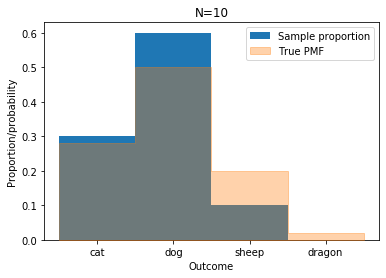

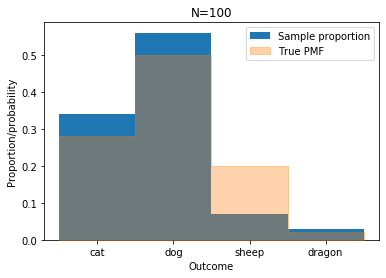

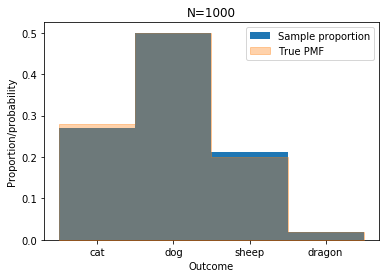

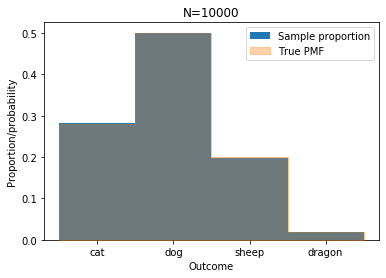

In [32]:

def string_histogram(mapping, samples):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # convert the strings back to indices 
    keys = list(mapping.keys())
    indices = [keys.index(s) for s in samples]
    
    # plot histogram of the counts, normalized
    ax.hist(indices, bins=np.arange(len(keys)+1), density=True, 
            label="Sample proportion")
    ax.set_xticks(np.arange(len(keys))+0.5)
    ax.set_xticklabels(keys)
    ax.set_xlabel("Outcome")
    ax.set_ylabel("Proportion/probability")
    
    xs, ys = [0], [0]
    for i, k in enumerate(keys):
        ys.append(mapping[k])
        xs.append(i+1)
        
    ax.fill_between(xs, ys, alpha=0.35, 
                    color='C1', step='pre', 
                    zorder=10, label="True PMF")
    plt.legend()

for N in [10, 100, 1000, 10000]:
    # draw N samples
    samples = discrete_sample(pmf, N)
    string_histogram(pmf, samples)
    plt.gca().set_title("N={N}".format(N=N))

## A more interesting PMF
The following code loads a text file (in this case, *Romeo and Juliet*), and converts into a vector of numerical codes. It keeps only letters and space, and converts everything to lowercase.

> Rom.  Give me a torch. I am not for this ambling.  
        Being but heavy, I will bear the light.  
>     
> Mer. Nay, gentle Romeo, we must have you dance.  
>  
> Rom.  Not I, believe me. You have dancing shoes  
        With nimble soles; I have a soul of lead  
        So stakes me to the ground I cannot move.  
>            
   

In [33]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
#alphabet = ' eaoiutnshrdlcmfwypvbgkjqxz'

def numerify(fname):    
    with open(fname) as f:        
        return np.array([alphabet.index(c) for c in f.read().lower() if c in alphabet])    

We can compute the empirical distribution of letters in Romeo and Juliet. Its probability mass function is just given by the normalised count of each character.

In [34]:
def empirical_pmf_plot(vector, alphabet, title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    probs,_,_ = ax.hist(vector, bins=np.arange(len(alphabet)+1), density=True)
    
    ax.set_xticks(np.arange(len(alphabet)+1)+0.5)
    ax.set_xticklabels(alphabet)
    ax.set_xlabel("Character $x$")
    ax.set_ylabel("Empirical probability $P(X=x)$")
    ax.set_title("Empirical PMF of {0}".format(title))
    return probs

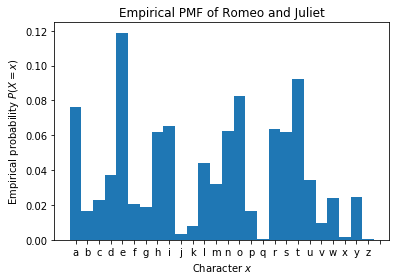

In [35]:
rj_chars = numerify("data/romeo_juliet.txt")
rj_pmf = empirical_pmf_plot(rj_chars, alphabet, "Romeo and Juliet")    

### Kafka
We can repeat the process with Kafka's *Metamorphosis*; an English text, but one with a different writing style.

> "What's happened to me?" he thought.  It wasn't a dream.  His room, a proper human room although a little too small, lay peacefully between its four familiar walls.  A collection of textile samples lay spread out on the table - Samsa was a travelling salesman - and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice, gilded frame.  It showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the whole of her lower arm towards the viewer.

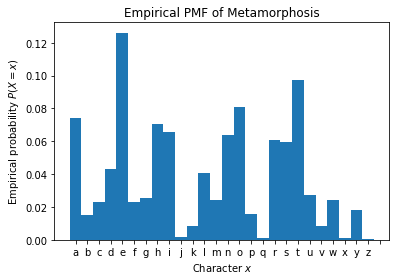

In [36]:
metamorphosis = numerify("data/metamorphosis.txt")
metamorphosis_pmf = empirical_pmf_plot(metamorphosis, alphabet, "Metamorphosis")    

The results are similar (both are English texts), but there are some subtle differences; there slightly more `q` characters in Kafka compared to Shakespeare; the frequencies of `h` and `i` are reversed.



As always, given a PMF, we can draw samples from it with our standard procedure, though the results aren't very exciting:

In [39]:
dict_pmf = {outcome:p for outcome,p in zip(alphabet, rj_pmf)}
"".join(discrete_sample(dict_pmf, 140))

'spnhilotmaeieetfbaiutrtnnlwbeeabjpwnsbmfoshsentedneimeoasctnymutbosakotduehtspprtohcsgosegtieftsamitatdnyahunbleermrouugnbrsuawalandhrdcbdpi'

### Joint, conditional, marginal

The **joint probability** of two random variables is written $$P(X,Y)$$ and gives the probability that $X$ and $Y$ take the specific values *simultaneously* (i.e. $P(X=x) \land P(Y=y)$). 

The **marginal probability** is the derivation of $P(X)$ from $P(X,Y)$ by integrating (summing) over all the possible outcomes of $Y$:
<div class="alert alert-box alert-success">
$$P(X) = \int_y P(X,Y) dy\  \text{for a PDF.}$$
$$P(X) = \sum_y P(X,Y)\  \text{for a PMF.}$$
    </div>

This allows us to compute a distribution over one random variable from a joint distribution by summing over all the possible outcomes of the other variable involved.

**Marginalisation** just means integration over one or more variables from a joint distribution: it *removes* those variables from the distribution.

Two random variables are **independent** if the they do not have any dependence on each other. If this is the case then the joint distribution is just the product of the individual distributions: $P(X,Y) = P(X)P(Y).$ This is **not true in the general case where the variables have dependence**.

The **conditional probability** of a random variable $X$ *given* a random variable $Y$ is written as $$P(X|Y)$$ and can be computed as
<div class="alert alert-box alert-success"> 

$$P(X|Y) = \frac{P(X,Y)}{P(Y)}. $$ </div>

This tells us how likely the outcomes of $X$ are *if we already know* (or fix) the outcomes of $Y$. Read as "probability of X taking on the value x given that Y has taken on the value y". The conditional probability is $P(X|Y)=P(X)$ and $P(Y|X)=P(Y)$ if $X$ and $Y$ are independent.

## Bigrams
We can look at these in the case of the character model of text we saw earlier. From the vector of character codes that make up "Metamorphosis" we can take every *pair of characters*, in order that they appear. That is, we consider two characters $c_{i-1}$ and $c_i$ at some index $i$. This is called a **bigram** model, and there are unigram, trigram, n-gram generalisations of the idea. A "gram" refers to a unit like a character or word, and we are discussing a character **bigram model**.


* The joint distribution of bigrams $P(C_i=c_i, C_{i-1}=c_{i-1})$ is given by the normalized count of each character pair.

* The marginal distribution $P(C_i=c_i)$ can be computed from $P(C_i=c_i, C_{i-1}=c_{i-1})$ by summing over every possible character $c_{i-1}$, and likewise to marginalise to find $P(C_{i-1}=c_{i-1})$

* The conditional distribution $P(C_i=c_i|C_{i-1}=c_{i-1})$ is given by the joint distribution, divided by the counts of $P(C_{i-1}=c_{i-1})$. It tells us how likely we are to observe a specific character $c_i$ *given* that we have observed a character $c_{i-1}$ just beforehand.



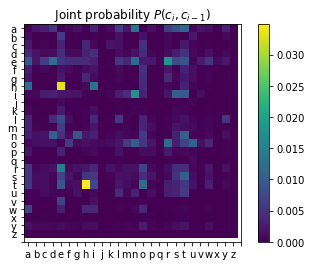

In [40]:
meta_joint = np.zeros([len(alphabet), len(alphabet)])
for c_1, c_2 in zip(metamorphosis[1:], metamorphosis[:-1]):
    meta_joint[c_2, c_1] += 1

# normalise by total number of pairs
meta_joint = meta_joint / np.sum(meta_joint)   

def show_2d_histogram(hist):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    img = ax.imshow(hist)
    fig.colorbar(img)
    ax.set_xticks(np.arange(len(alphabet)+1))
    ax.set_xticklabels(alphabet)
    ax.set_yticks(np.arange(len(alphabet)+1))
    ax.set_yticklabels(alphabet)
    ax.set_title("Joint probability $P(c_{i},c_{i-1})$")

# rows = c_i-1, columns = c_i    
show_2d_histogram(meta_joint)


This tells us how likely each possible **pair** of characters is. Some combinations are much more likely than others.

In [41]:
# compute the marginial probabilities, by summing over the relevant axes
# it's this easy!
meta_c1 = np.sum(meta_joint, axis=0)
meta_c2 = np.sum(meta_joint, axis=1)

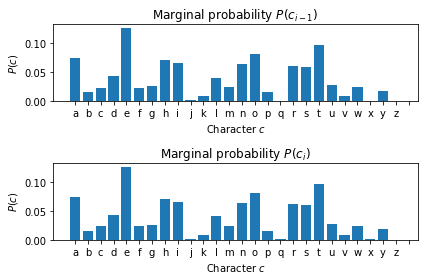

In [42]:
# plot them
fig = plt.figure()

def show_1d_histogram(hist):
    ax.bar(np.arange(len(alphabet)), hist)
    ax.set_xticks(np.arange(len(alphabet)+1))
    ax.set_xticklabels(alphabet)
    ax.set_ylabel("$P(c)$")
    ax.set_xlabel("Character $c$")

ax = fig.add_subplot(2,1,1)
show_1d_histogram(meta_c1)
ax.set_title("Marginal probability $P(c_{i-1})$")

ax = fig.add_subplot(2,1,2)
show_1d_histogram(meta_c2)
ax.set_title("Marginal probability $P(c_{i})$")
plt.tight_layout()

Text(0.5, 1.0, 'Conditional probability $P(c_i|c_{i-1})$')

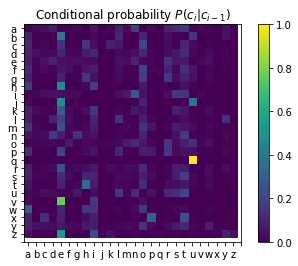

In [43]:
# p(c2|c1) = p(c1,x2) / p(c1)
# have to transpose to normalise across columns, instead of rows
meta_conditional = (meta_joint.T / meta_c1).T

# plot it
show_2d_histogram(meta_conditional)
plt.gca().set_title("Conditional probability $P(c_i|c_{i-1})$")

This tells us what character to expect, *given the character we know we saw before*. It lets us *predict* the next character. We can look along the rows to do this look up: each row sums to 1.0. For example, look at row "q": the probability is concentrated on the entry in column "u" -- "u" always follows "q" in English.

----

# Writing and manipulation of probabilities 

Probabilities can be used to represent belief. But the raw numbers (e.g. $P(X=x) = 0.9999$) are not always a useful to make judgments, communicate results, or in some cases, even to do computations. 

The graph below shows the probability that a sample of people imagined, given specific verbal cues.  The results are very interesting, but notice that the graph has almost no points close 0.0 or 1.0 -- what about 1 in a million events? What about the probability of the sun rising tomorrow?

<img src="imgs/joy1.png">

*Image credit: Graph by Zonination, from https://github.com/zonination/perceptions, license [MIT](https://github.com/zonination/perceptions/blob/master/LICENSE)*

One of the problems is that even if people had responded accurately, the linear visualisation from 0% to 100% makes it very hard to see extreme values.

### Odds, log odds
The **odds** of an event with probability $p$ is defined by:
<div class="alert alert-box alert-success">
    
$$\text{odds} =  \frac{1-p}{p}$$
</div>

The odds are a more useful unit for discussing unlikely scenarios (odds of 999:1 is easier to understand than $p=0.001$).

In [46]:
p = 0.18

def odds(p):
     return (1-p) / (p)
    
print("p %.4f => odds %.2f:1" %(p,odds(p)))

p 0.1800 => odds 4.56:1


**Log-odds** or **logit** are particularly useful for very unlikely scenarios:

<div class="alert alert-box alert-success">
$$
\text{logit}(p) = \log \left(\frac{p}{1-p}\right)
$$   
</div>

The logit scales proportionally to the number of zeros in the numerator of the odds.

In [47]:

def logit(p):
    return np.log((p)/(1-p))  

def print_logit(p):
    print("p {p: 12.8f} odds {odds: 12.1f}   log odds {log_odds:12.4f}".format(p=p, odds=odds(p), log_odds=logit(p)))
    
print_logit(0.1)
print_logit(0.01)
print_logit(0.001)
print_logit(0.00000003)



p   0.10000000 odds          9.0   log odds      -2.1972
p   0.01000000 odds         99.0   log odds      -4.5951
p   0.00100000 odds        999.0   log odds      -6.9068
p   0.00000003 odds   33333332.3   log odds     -17.3221


Both of these are typically used to *display* results, rather than to do computations. But **log-probabilities** are widely used for computation as well as display. They help solve *numerical problems* in probability calculations.

### Log probabilities

The probability of multiple *independent* random variables taking on a set of values can be computed from the product:
$$P(X,Y,Z) = P(X)P(Y)P(Z)$$
and in general
<div class="alert alert-box alert-success">
    
$$P(X_1=x_i, \dots, X_n=x_n) = \prod_{i=1}^{n} P(X_i=x_i)$$
</div>

We often have to have to compute such products, but to multiply lots of values $<1$ leads to numerical issues: we will get floating point underflow. Instead, it is numerically more reliable to manipulate **log probabilities**, which can be summed instead of multiplied:
<div class="alert alert-box alert-success">
    
$$\log P(x_1, \dots, x_n) = \sum_{i=1}^{n} \log P(x_i)$$
</div>

This uses the identity $\log(AB) = \log(A) + \log(B)$

This is simply a numerical convenience which avoids underflow. The **log-likelihood** is just $\log P(B|A)$, and is often more convenient to work with than the raw likelihood.

When talking about **likelihood**, we often write $\mathcal{L}(x_i)$ to mean the likelihood of $x_i$. The likelihood is not a probability. It is a function of data, and $\mathcal{L}(x_i) = f_X(x_i)$

For example, consider the empirical PMF of Romeo and Juliet. This gives the probability of seeing any given character. The likelihood of seeing all of the characters, given our per-character probability model, is:

$$\mathcal{L}(c_1, c_2, \dots\ c_n) = \prod_i P(c_i)$$

This is the likelihood of the text.

In [48]:
def likelihood(sequence, p):
    
    result = 1.0
    for char in sequence:
        # this is bad: multiplying lots of small numbers
        # will underflow very quickly
        result = result * p[char]
    return result
    

In [49]:
print(likelihood(rj_chars, rj_pmf)) # huh?

0.0


The log-likelihood does not have this problem with underflow:
    
$$\log \mathcal{L}(c_1, c_2, \dots\ c_n) = \sum_i \log P(c_i)$$


In [50]:
def log_likelihood(sequence, p):
    result = 0.0
    for char in sequence:
        ## summing logs is stable numerically
        result = result + np.log(p[char])
    return result


In [51]:
# 
print(log_likelihood(rj_chars, rj_pmf))

-344778.03999527503


### Comparing log-likelihoods
We could imagine that writing plays and novels is an activity that mysterious entities do by generating random characters according to a PMF. Under this (very simplified!) assumption, we could now take an "unknown" text (in this case *Macbeth*) and then look at how likely it would have been to have been generated under two models:
* *A* It was generated by a mysterious entity using the PMF for *Romeo and Juliet*
* *B* It was generated by a mysterious entity using the PMF for *Metamorphosis*

Neither of these will be exactly true, but we can precisely quantify to what extent *Macbeth* appears to have been generated by a similar process to these two reference texts.

This is a very rough proxy for whether or not they were generated by the same mysterious entity -- i.e. author. Our model is just the distribution of characters, so is a fairly weak model of different styles. However, it is sufficient to do the comparison here.

In [52]:
macbeth_chars = numerify("data/macbeth.txt")

## A positive value indicates more likely to be "like" 
# Romeo and Juliet; negative is evidence
## in favour of Metamorphosis (i.e. written by Kafka)
print(log_likelihood(macbeth_chars, rj_pmf)-
      log_likelihood(macbeth_chars, metamorphosis_pmf))

113.97323849247186


In [53]:
## We could repeat this with another text, in this case
## "The Trial", by Kafka
trial_chars = numerify("data/the_trial.txt")

## A positive value indicates more likely to be "like" Romeo and Juliet
print(log_likelihood(trial_chars , rj_pmf)-
      log_likelihood(trial_chars, metamorphosis_pmf))

-928.3458629352972


## ☣ Plague ☣

* A new test is developed that can detect *Plague X* with 95% accuracy. 
* We'll assume that 95% accuracy means:
    * a 5% **false positive rate**, i.e. 5% of the time people who don't have the disease test positive
    * a 5% **false negative rate**, i.e. 5% of the time people have the disease test negative
* One in one hundred thousand (1:100000) people are known to have *Plague X*
    * we might know this because it's universally fatal within one year, and one in a hundred thousand people died of it last year, for example.
* You go for the test, and it comes back *positive* for *Plague X*.
* How likely are you to have *Plague X*?

### Options
* A: about 95 in 100
* B: about  5 in 100
* C: about 1 in 100
* D: about 1 in 5000
* E: about 1 in 10000                              
        

# Bayes' Rule

## Prior, likelihood, posterior

### Inverting conditional distributions
We often want to know the probability of a some event $A$ given some other event $B$; that is $P(A|B)$. But we are often in the situation that we can only compute $P(B|A)$. 

This case is usually:
* we know how the mysterious entity behaves $P(B|A)$;
* we know what data we saw $P(B)$;
* we know what the mysterious entity is likely to be up to in general;
* and we want to work out what the mysterious entity is doing $P(A|B)$.

In general $P(A|B) \neq P(B|A);$ and the two expressions can be completely different. 

Typically, this type of problem occurs where we:
* want to know the probability of some event given some *evidence* (*how likely is it that I have a disease given that my blood test came back positive?*) 
* but we only know the probability of observing evidence given the event (*if you have this disease, the blood test will come back positive 95% of the time*).

**Bayes' rule** gives the correct way to invert the probability distribution:
<div class="alert alert-box alert-success">
    
$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$
</div>

This follows directly from the axioms of probability. Bayes' Rule is a very important rule, and has some surprising consequences. 

### Nomenclature
* $P(A|B)$ is called the **posterior** -- what we want to know, or will know after the computation
* $P(B|A)$ is called the **likelihood** -- how likely the event $A$ is to produce the evidence we see
* $P(A)$ is the **prior**  -- how likely the event $A$ is regardless of evidence
* $P(B)$ is the **evidence** -- how likely the evidence $B$ is regardless of the event.

Bayes' rule gives a consistent rule to take some prior belief and combine it with observed data to estimate a new distribution which combines them.

We often phrase this as some **hypothesis** $H$ we want to know, given some **data** $D$ we observe, and we write Bayes' Rule as:
<div class="alert alert-box alert-success">
    
$$ P(H|D) = \frac{P(D|H) P(H)}{P(D)} $$
</div>

$H$ and $D$ are random variables in this expression.

(the probability of the hypothesis given the data) is equal to (the probability of the data given the hypothesis) times (the probability of the hypothesis) divided by (the probability of the data). In other words, if we want to work out how likely a hypothesis is to be true given observations, but we only know how likely we are to have seen those observations if that hypothesis *was* true, we can use Bayes' rule to solve the problem.

## Integration over the evidence
We can say that the posterior probability is *proportional* to the product of the prior and the likelihood. But to evaluate its value, we need to compute $P(D)$, **the evidence**. 

It is difficult to see what this represents at first. But one way to think of it is as the result of marginalising the $P(D)$ from the joint distribution $P(H,D)$; that is integrating $P(H,D)$ over every possible outcome of $H$, for each possible $D$. 

<div class="alert alert-box alert-success">
Because probabilities must add up to 1, we can write $P(B)$ as:
$$P(D)  = \sum_{i} P(D|H_i) P(H_i) $$ 
for a set of discrete outcomes  $A_i$ or
$$ P(D) = \int_{A} P(D|H) P(H) dA $$ for a continuous distribution of outcomes.
</div>

<font color="green"> This trick is essential in understanding Bayes Rule! </font>

In general this can be difficult to compute. For binary simple cases where there are only two possible outcomes ($H$ can only be 0 or 1), Bayes' rule can be written as:

$$P(H=1|D) = \frac{P(D|H=1)P(H=1)}{P(D|H=1)P(H=1) + P(D|H=0) D(H=0)}, $$
    
    
    

Bayes Rule for *Plague X*

        P(Plague|Test) = [P(Test|Plague) P(Plague)] / P(Test)

        # integrate over the two possible 
        #states of Plague
        P(Test) =  [P(Test|not Plague)P(not Plague) +
                    P(Test|Plague)P(Plague)]
        

In [54]:
# one in a ten thousand have the plague
P_Plague = 1.0 / 100000    

# if you have the plague, test is positive with 5% error
P_Test_Plague = 1-0.05            
# If you don't have the plague, the test is positive 5% of the time
P_Test_not_Plague = 0.05        

# chance you don't have the plague, before we see the test
P_not_Plague = 1-P_Plague         

# integrate over evidence; only two possibilities here
P_Test = (P_Test_Plague * P_Plague +  
            P_Test_not_Plague * P_not_Plague)

# what is the probability you have the plague, 
# given this 95% accurate test?
# (hint: it is not 95%!)
P_Plague_Test = P_Test_Plague * P_Plague / P_Test

print("After testing positive, you have a 1:%.0f chance of having the plague" % ((1-P_Plague_Test)/P_Plague_Test))

After testing positive, you have a 1:5263 chance of having the plague


## Natural frequency
There is an approach to explaining problems like this which makes it much less likely to make poor judgements. **Natural frequency** explanations involve imagining concrete populations of a fixed size (10000 people in a room, for example), and considering the proportions of the populations as *counts* (how many people in the room have the plague?).

We can use this to visualise the problem above and explain the apparent paradox. The graph below shows the case $P(\text{plague})=0.005$ (1 in 200), again with a 5% accurate test.

<img src="imgs/plague.png">



## Bayes' rule for combining evidence
Bayes' rule is the correct way to combine prior belief and observation to update beliefs. We always transform from one probability distribution (prior) to a new belief (posterior) using some observed evidence. This can be used to "learn", where "learning" means updating a probability distribution based on observations. It has enormous applications anywhere uncertain information must be fused together, whether from multiple sources (e.g. sensor fusion) or over time (e.g. probabilistic filtering). 


# Entropy
A key property of a probability distribution is the **entropy**. Intuitively, this is a measure of the "surprise" an observer would have when observing draws from the distribution, or alternatively, the (log) measure of a number of distinct "states" a distribution could represent. A flat, uniform distribution is very "surprising" because the values are very hard to predict; a narrow, peaked distribution is unsurprising because the values are always very similar. 

This is a precise quantification -- it gives the *information* in a distribution. The units of information are normally bits; where 1 bit of information tells you the answer to exactly one yes or no question. The entropy tells you exactly how many of bits are needed (at minimum) to communicate a value from a distribution to an observer *who knows the distribution already*. Alternatively, you can see the number of distinct states the distribution describes as $p = 2^{H(X)}$ -- this value is called the **perplexity**, and it can be fractional.

## Entropy is just the expectation of log-probability
The entropy of a (discrete) distribution of a random variable $X$ can be computed as:
<div class="alert alert-box alert-success">
    
$$\begin{equation}H(X) = \sum_{x} -P(X=x) \log_2(P(X=x))\end{equation}$$
</div>

This is just the expected value of the log-probability of a random variable (the "average" log-probability).

### Tossing coins
Consider a coin toss: this is sampling from a discrete random variable that can take on two states, heads and tails. 

If we call our two possible states 0 (heads) and 1 (tails), we can characterise this with a single parameter $q$, where $P(X=0)=q$ and $P(X=1)=(1-q)$ (this follows from the fact that as $P(X=0)+P(X=1)$ *must* equal 1 -- the coin must land on one side or the other. We ignore edge landings!).

If this process is very biased and heads are much more likely than tails ($q<<0.5$), an observer will be unsurprised most of the time because predicting heads will be a good bet. If the process is unbiased ($q=0.5$), an observer will have no way to predict if a head or tail is more likely. We can write the entropy of this distribution:
$$H(X) = P(X=0) \log_2 P(X=0) + P(X=1) \log_2 P(X=1)$$
$$ = -q \log_2 q - (1-q) \log_2 P(1-q)$$


c:\local\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\local\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


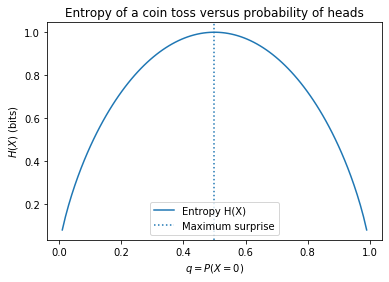

In [55]:
def binary_entropy(q):
    return -q * np.log(q)/np.log(2) - (1-q) * np.log(1-q)/np.log(2)

def plot_binary_entropy():
    x = np.linspace(0,1,100)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, binary_entropy(x), label="Entropy H(X)")
    ax.axvline(0.5, ls=':', label='Maximum surprise')
    ax.legend()
    ax.set_xlabel('$q=P(X=0)$')
    ax.set_ylabel('$H(X)$ (bits)')
    ax.set_title("Entropy of a coin toss versus probability of heads")
    
plot_binary_entropy()

This corresponds with our intuition -- an unbiased coin toss is the most surprising distribution. Entropy is a critically important concept in **information theory** which relates probability to the problems of communication. We can measure how well Bayesian updating is going by measuring the drop in entropy of the posterior belief; as we add evidence, we should become less surprised about the possible outcomes.


In our letter-based bigram example, we can compute the entropy of each conditional distribution $P(c_i|c_{i-1})$. This will tell us how surprised we will be by the characters that might follow a character $c_i$.

Text(0.5, 1.0, 'Entropy of conditional distribution $H(c_i|c_{i-1})$')

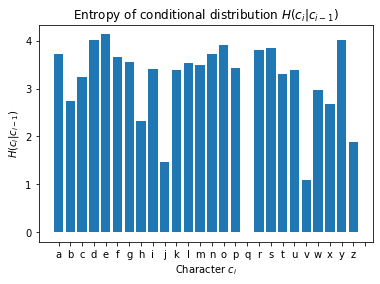

In [56]:
h_meta_conditional = np.sum(-np.log2(meta_conditional+1e-7) * meta_conditional, axis=1)

# plot the entropy of the conditional
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
plt.bar(np.arange(len(alphabet)), h_meta_conditional)
ax.set_xticks(np.arange(len(alphabet)+1))
ax.set_xticklabels(alphabet)
ax.set_ylabel("$H(c_i|c_{i-1})$")
ax.set_xlabel("Character $c_i$")
ax.set_title("Entropy of conditional distribution $H(c_i|c_{i-1})$")


#### Interpreting entropy
We can see that observing a "q" means the next character isn't surprising at all: we know for *sure* that it will be a "u", and thus the entropy is 0.  There is only one configuration of the world for the next character (under this model) if we have just seen a "u".

Likewise, seeing a space character gives us very little information, and the next character could be anything: the character after a space will surprise us -- there are lots of configurations of the world that might follow a space. That surprise is as much surprise as we would get by tossing about 4 coins, or an entropy of about 4 bits.

---

## Resources
### Recommended

* **Probability** by Peter Norvig http://nbviewer.jupyter.org/url/norvig.com/ipython/Probability.ipynb

* **Chapters 2 and 3 of Information Theory, Inference, and Learning Algorithms** by David Mackay (freely available online)
    * http://www.inference.org.uk/mackay/itprnn/ps/22.40.pdf 
    * http://www.inference.org.uk/mackay/itprnn/ps/47.59.pdf
    
---
### Other useful resources
* **Veritasium explains Bayes' Theorem** https://www.youtube.com/watch?v=R13BD8qKeTg    

* **Think Bayes** by Allen Downey  http://greenteapress.com/wp/think-bayes/ (a freely available book on Bayesian probability theory)
    * **Video by same author** https://www.youtube.com/watch?v=TpgiFIGXcT4 
    
* **A collection of very readable articles by Count Bayesie** https://www.countbayesie.com/blog/2016/5/1/a-guide-to-bayesian-statistics 

* **Khan Academy materials on probability** https://www.khanacademy.org/math/statistics-probability/probability-library (more in depth than we cover, but high quality stuff)

## Beyond this course
* [**The Probability and Statistics Cookbook**](http://pages.cs.wisc.edu/~tdw/files/cookbook-en.pdf) which covers most of probability and statistics in 28 incredibly dense pages.

* **Probability Theory: The Logic of Science 1st Edition** *by E. T. Jaynes* (this is an *excellent* but hardcore book; also it is very heavily biased to Bayesian interpretations of probability!)

* **A First Course in Probability ** *by Sheldon Ross* (standard textbook on probability)

* [**Introduction to statistical learning**](http://www-bcf.usc.edu/~gareth/ISL/) (outstanding introduction to statistical learning, including a book, video and course notes)